<a href="https://colab.research.google.com/github/yasithmilinda/MySqlBackup/blob/master/Abhiram%20Kankipati%20-%20Abstract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project:  PC Video Game Recommendation System

**Name**: N V Abhiram Naidu Kankipati

**Email**: nkank001@odu.edu

**Portifolio**: https://www.cs.odu.edu/~nkankipa/

## **Abstract**

### **Introduction**

Video games are one of the main sources of entertainment for billions of people worldwide. They provide relief from stress and currently one of the best ways for social interaction. They need high human interaction and currently, education and medical sectors are using video games to educate students and interactive therapy sessions for patients respectively. 

As per theGamer and ESA, the video game industry has been growing stronger even in pandemic period 
"At a time of financial uncertainty, the gaming sector has provided a significant boost to the US economy. A new study from the Entertainment Software Association (ESA) revealed that the video game industry generated $90.3 billion in annual economic output and supported an estimated 429,000 jobs nationwide."

Selecting a game is a difficult task, you need to check on many variables and there are thousands of games to choose for. We will be wasting time by going through articles, reviews, gameplays of several games, etc before choosing a game. After completing a game of a specific genre like a role-playing FPS you either like to play similar kinds of games or go for trending games then. This recommendation model is for both categories of gamers so that you do not waste time deciding on a game instead spend on enjoying that game.

### **Data Source**

Will be extracting data from below 27 wikipedia pages and conert into single csv file

https://en.wikipedia.org/wiki/List_of_PC_games_(A)

https://en.wikipedia.org/wiki/List_of_PC_games_(B)

https://en.wikipedia.org/wiki/List_of_PC_games_(C)

...

https://en.wikipedia.org/wiki/List_of_PC_games_(Z)

https://en.wikipedia.org/wiki/List_of_PC_games_(Numerical)

In [ ]:
from matplotlib import mlab
import matplotlib.pyplot as plt
import datetime as dt
from wordcloud import WordCloud

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
K= chr
game_A = pd.read_html("http://wikipedia.org/wiki/List_of_PC_games_(Numerical)")
data = game_A[0]
for K in range(ord('A'), ord('Z') + 1):
    link= ('http://wikipedia.org/wiki/List_of_PC_games_('+chr(K)+')')
    gamedata = pd.read_html(link)
    print('Extracting from : '+link+' Type: ',type(gamedata[0]))
    data = data.append(pd.DataFrame(gamedata[0]),  ignore_index=True)
print(data)
from google.colab import data_table
data.to_csv("data.csv",index=False)


Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(A) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(B) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(C) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(D) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(E) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(F) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(G) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(H) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting from : http://wikipedia.org/wiki/List_of_PC_games_(I) Type:  <class 'pandas.core.frame.DataFrame'>
Extracting

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                73 non-null     object
 1   Developer            1057 non-null   object
 2   Publisher            895 non-null    object
 3   Genre(s)             1056 non-null   object
 4   Operating system(s)  1052 non-null   object
 5   Date released        1049 non-null   object
 6   Name                 985 non-null    object
 7   Producer             153 non-null    object
dtypes: object(8)
memory usage: 66.2+ KB


In [ ]:
data["Title"] = np.where(data["Title"].isna(),data["Name"],data["Title"]).astype("str")
data =data.drop("Name",axis=1)
data["Publisher"] = np.where(data["Publisher"].isna(),data["Producer"],data["Publisher"]).astype("str")
data =data.drop("Producer",axis=1)
data

,Title,Developer,Publisher,Genre(s),Operating system(s),Date released
0,_summer,Hooksoft,Hook,Visual novel,Microsoft Windows,"July 15, 2005"
1,0 A.D.,Wildfire Games,Wildfire Games,RTS,"Microsoft Windows, Linux, macOS","August 16, 2010"
2,007 Legends,Eurocom,Activision,First-person shooter,Microsoft Windows,"November 2, 2012"
3,007: Licence to Kill,Quixel,Domark,Top-down shooter,MS-DOS,"April 20, 1989"
4,007: Quantum of Solace,"Treyarch, Beenox","Activision, Square Enix",First-person shooter,Microsoft Windows,"October 31, 2008"
...,...,...,...,...,...,...
1053,Zup! Arena,Quiet River,Quiet River,"Action, MMO",Microsoft Windows,"December 3, 2018"
1054,Zup! X,Quiet River,Quiet River,Puzzle,Microsoft Windows,"May 17, 2018"
1055,Zup! Zero,Quiet River,Quiet River,Puzzle,Microsoft Windows,"April 6, 2017"
1056,Zup! Zero 2,Quiet River,Quiet River,Puzzle,Microsoft Windows,"September 11, 2018"


In [ ]:
data.head(20)

,Title,Developer,Publisher,Genre(s),Operating system(s),Date released
0,_summer,Hooksoft,Hook,Visual novel,Microsoft Windows,"July 15, 2005"
1,0 A.D.,Wildfire Games,Wildfire Games,RTS,"Microsoft Windows, Linux, macOS","August 16, 2010"
2,007 Legends,Eurocom,Activision,First-person shooter,Microsoft Windows,"November 2, 2012"
3,007: Licence to Kill,Quixel,Domark,Top-down shooter,MS-DOS,"April 20, 1989"
4,007: Quantum of Solace,"Treyarch, Beenox","Activision, Square Enix",First-person shooter,Microsoft Windows,"October 31, 2008"
5,1-0 Soccer Manager,New Era Software,Wizard Games,"Sports, management",MS-DOS,1992
6,101 Dalmatians: Escape from DeVil Manor,DreamForge Intertainment,Disney Interactive,"Action, adventure, strategy",Microsoft Windows,1997
7,102 Dalmatians: Puppies to the Rescue,Crystal Dynamics,Disney Interactive,Platform,Microsoft Windows,2000
8,10th Frame,Access Software,US Gold,Sports,MS-DOS,1986
9,140,Jeppe Carlson,nan,Platformer,"Microsoft Windows, Linux, macOS","October 16, 2013"


In [ ]:
data.describe()

,Title,Developer,Publisher,Genre(s),Operating system(s),Date released
count,1058,1057,1058,1056,1052,1049
unique,1057,583,486,285,200,876
top,A Hat in Time,Maxis,Electronic Arts,First-person shooter,Microsoft Windows,1995
freq,2,30,84,98,466,8


In [ ]:
data.isnull()

,Title,Developer,Publisher,Genre(s),Operating system(s),Date released
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1053,False,False,False,False,False,False
1054,False,False,False,False,False,False
1055,False,False,False,False,False,False
1056,False,False,False,False,False,False


In [ ]:
data.isnull().any()

Title                  False
Developer               True
Publisher              False
Genre(s)                True
Operating system(s)     True
Date released           True
dtype: bool

### Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


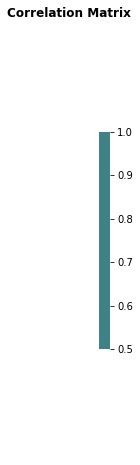

In [ ]:
plt.figure(figsize=(10,8))
palette = sns.diverging_palette(20, 200, n=256)
corr=data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette,vmin =1, vmax=.5, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5}).set(ylim=(9, 0))
plt.title("Correlation Matrix",size=12, weight='bold')
plt.show()

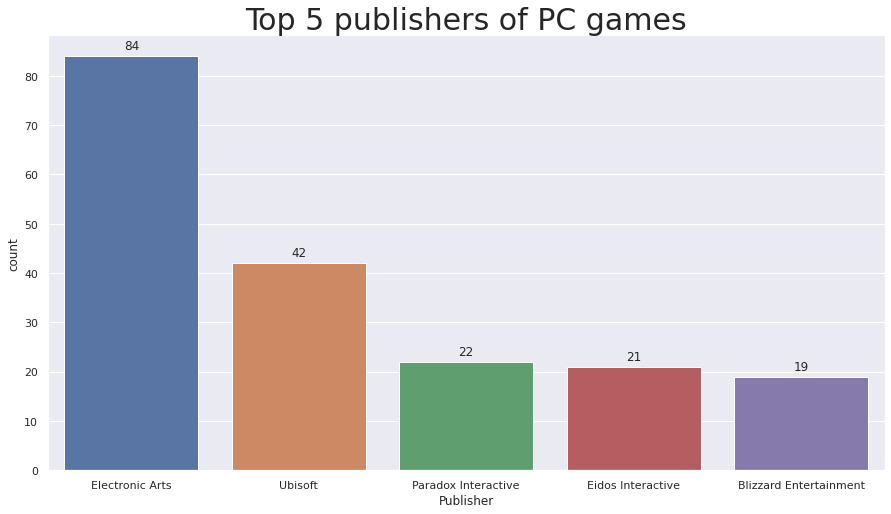

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
ax=sns.countplot(x = "Publisher", order=data['Publisher'].value_counts().index[0:5] ,data=data)
plt.title('Top 5 publishers of PC games',
         fontsize =30 
         )
for p in ax.patches:
 ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



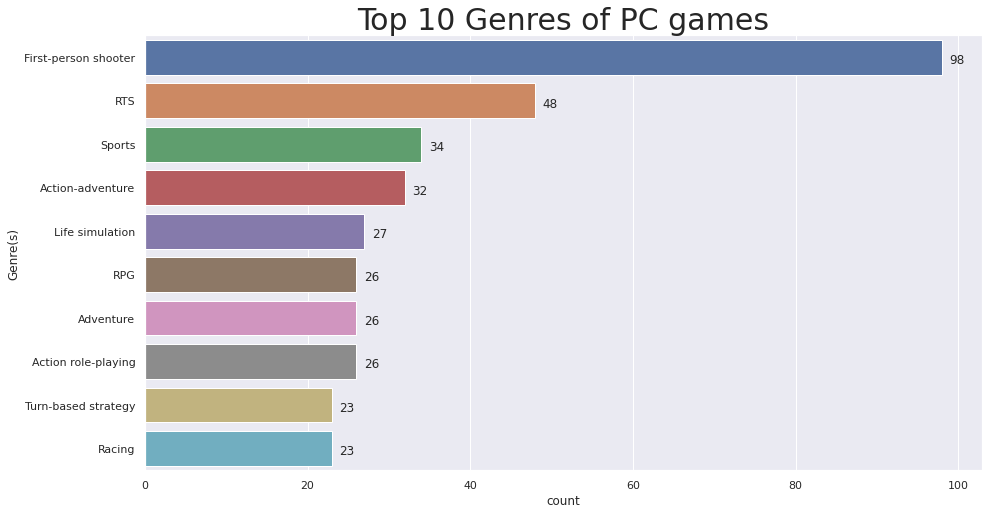

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
ax=sns.countplot(y = "Genre(s)", order=data['Genre(s)'].value_counts().index[0:10] ,data=data)
plt.title('Top 10 Genres of PC games',
         fontsize =30 
         )
for p in ax.patches:
 ax.annotate(format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), ha = 'center', va = 'center', xytext = (15,-20), textcoords = 'offset points')



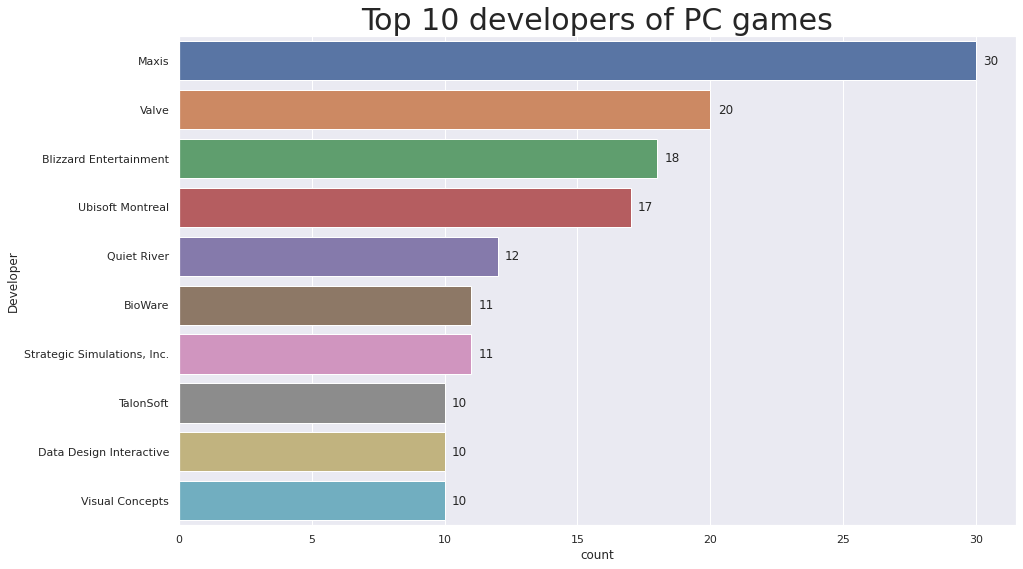

In [ ]:
plt.figure(figsize=(15,9))
sns.set_theme(style="darkgrid")
ax=sns.countplot(y = "Developer", order=data['Developer'].value_counts().index[0:10] ,data=data)
#plt.xlabel ("Developer",fontsize =24)
plt.title('Top 10 developers of PC games',
         fontsize =30 
         )
for p in ax.patches:
 ax.annotate(format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), ha = 'center', va = 'center', xytext = (15,-20), textcoords = 'offset points')



year released

In [ ]:
from pandas import DataFrame,Series
data['year'] = DataFrame(data['Date released'].str[-4:])
data['year']

0       2005
1       2010
2       2012
3       1989
4       2008
        ... 
1053    2018
1054    2018
1055    2017
1056    2018
1057    1991
Name: year, Length: 1058, dtype: object

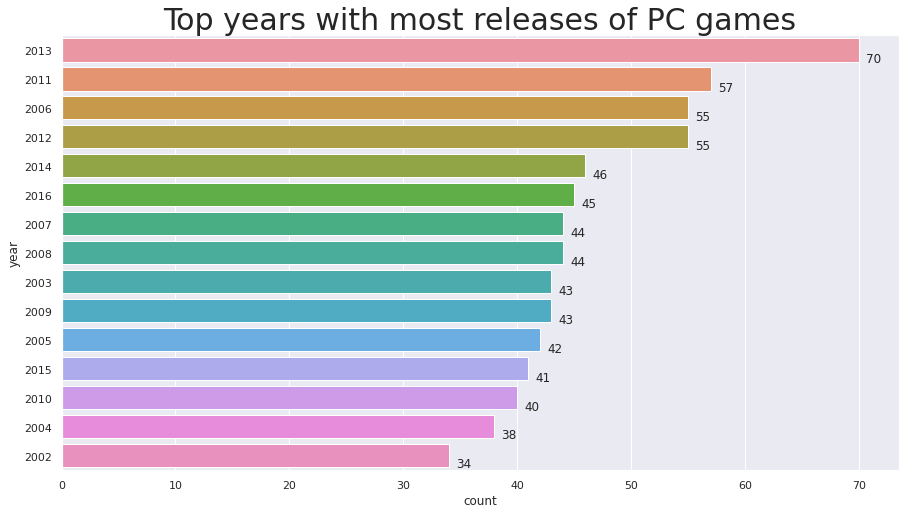

In [ ]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
ax=sns.countplot(y = "year", order=data['year'].value_counts().index[0:15] ,data=data)
plt.title('Top years with most releases of PC games',
         fontsize =30 
         )
for p in ax.patches:
 ax.annotate(format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), ha = 'center', va = 'center', xytext = (15,-20), textcoords = 'offset points')

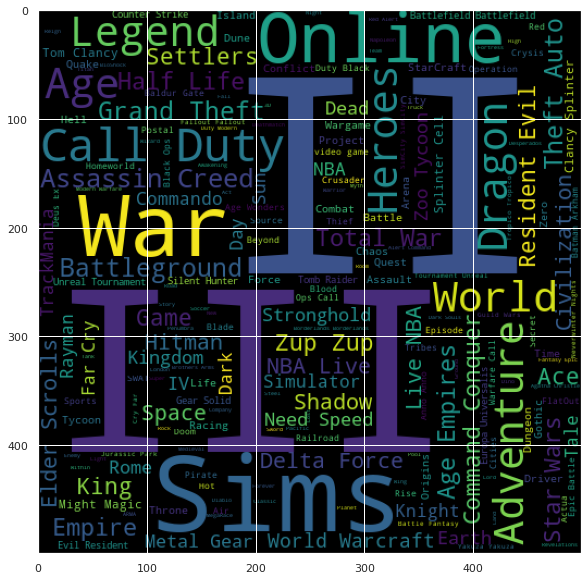

In [ ]:
#Most used words in Titles
wordcloud = WordCloud(width = 500, height = 500).generate(" ".join(data.Title.astype(str)))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.show()

In [ ]:
# import datetime
# data['year'] = datetime.date(data['Date released'])
# data['year'].strftime('%B %d %Y')


In [ ]:
# Year= data['Date released'].dt.Year

# plt.figure(figsize=(15,8))
# ax=sns.countplot(x = "Year", order=Year.value_counts().index[0:5])

### **Attributes**



Genre

Operating systems supported

Release year

Publisher

Developer

## **End Goal**

The end goal of this project is to


1.   Build a recommendation system for PC video games by taking 1-3 games liked by user as input
2.   If a user does not provide any input but clicks on submit then the system considers the user as newcomer and provides games liked by other users and best games of this decade.



